<a href="https://colab.research.google.com/github/Thorvi98/Prova-II-Analise-De-Dados/blob/main/Prova_II_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prova Prática II**
Aluno: Vitor Hugo de J. Pereira

Prontuário: BT3031578

#1.0 - Introdução
Nesta prova estamos efetuando a análise da base de dados abaixo, para verificar uma média de acidentes rodoviários e analisar diferentes aspectos que ocasionam a chance de sobrevivência ou não das pessoas que se envolveram nestes acidentes. Utilizaremos as variáveis de gênero, velocidade do impacto e idade para realizar estas análises.


Base de Dados: Road Accident Survival Dataset
https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/accident.csv'

import pandas as pd
data = pd.read_csv(file_path)

print(data.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0
5   25    Male             49.0         Yes           Yes         1
6   38    Male            116.0         Yes           Yes         1
7   56    Male             47.0         Yes           Yes         1
8   36  Female             83.0         Yes            No         1
9   40  Female            116.0         Yes            No         1


# 2.0 - Tratando valores nulos!

In [ ]:
import pandas as pd

print("Valores nulos antes do tratamento:")
print(data.isnull().sum())

if 'Speed_of_Impact' in data.columns:
    data = data.assign(Speed_of_Impact=data['Speed_of_Impact'].fillna(data['Speed_of_Impact'].mean()))

if 'Gender' in data.columns:
    data = data.assign(Gender=data['Gender'].fillna(data['Gender'].mode()[0]))

print("\nValores nulos após o tratamento:")
print(data.isnull().sum())

print("\nInformações sobre os dados após o tratamento:")
print(data.info())


Valores nulos antes do tratamento:
Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

Valores nulos após o tratamento:
Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

Informações sobre os dados após o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
None


# 3.0 - Análise Descritiva





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Resumo Estatístico:
             Age  Speed_of_Impact   Survived
count  200.00000       200.000000  200.00000
mean    43.42500        70.441624    0.50500
std     14.94191        29.897360    0.50123
min     18.00000        20.000000    0.00000
25%     31.00000        43.000000    0.00000
50%     43.50000        71.000000    1.00000
75%     56.00000        95.000000    1.00000
max     69.00000       119.000000    1.00000


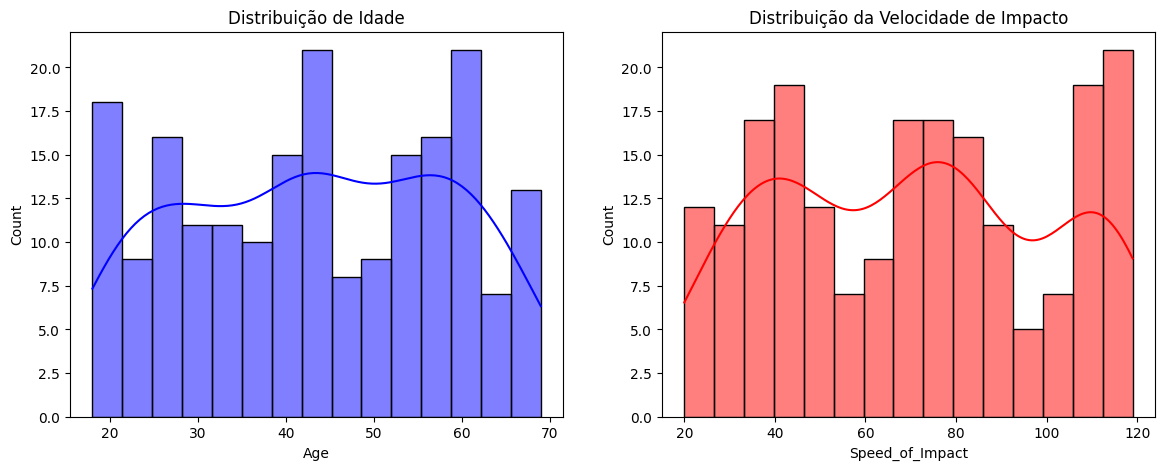

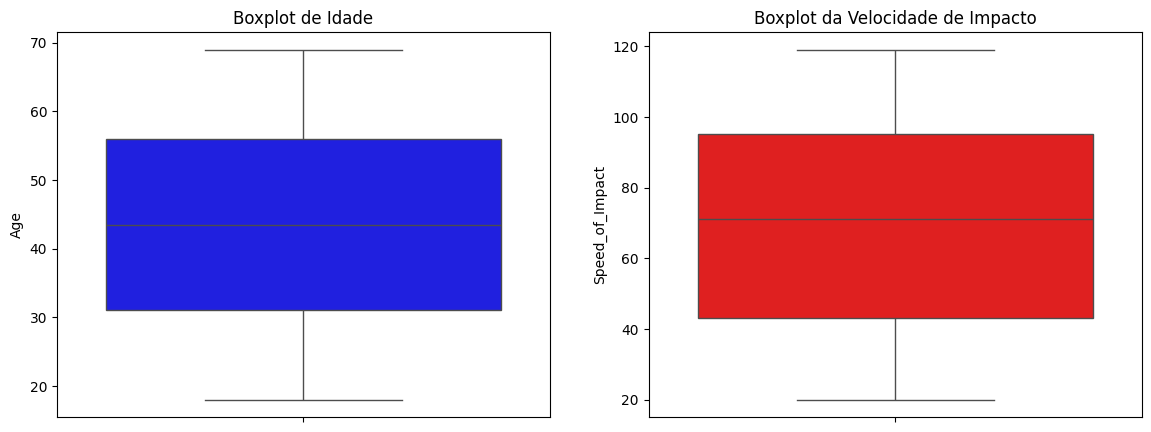

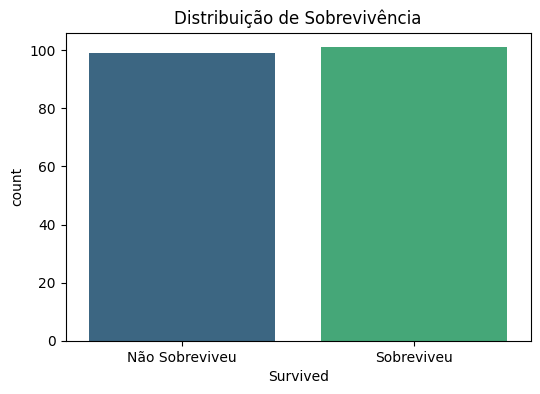

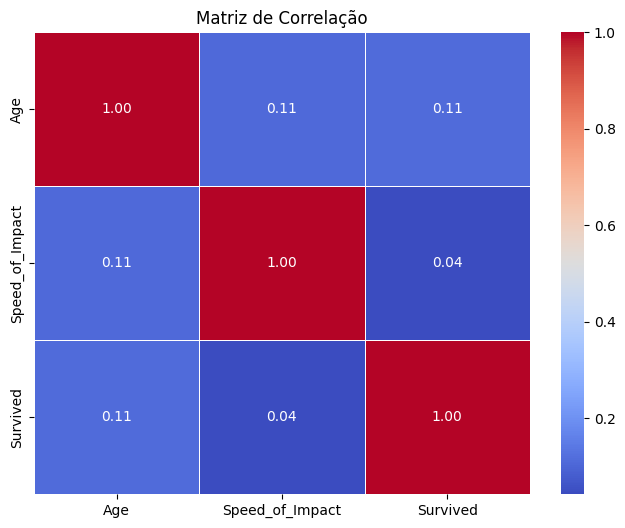

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/accident.csv'

data = pd.read_csv(file_path)

# 1. Resumo estatístico das variáveis numéricas
print("Resumo Estatístico:")
print(data.describe())

# 2. Histograma das variáveis numéricas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Age'], bins=15, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribuição de Idade')

sns.histplot(data['Speed_of_Impact'], bins=15, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribuição da Velocidade de Impacto')

plt.show()

# 3. Boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(y=data['Age'], ax=axes[0], color='blue')
axes[0].set_title('Boxplot de Idade')

sns.boxplot(y=data['Speed_of_Impact'], ax=axes[1], color='red')
axes[1].set_title('Boxplot da Velocidade de Impacto')

plt.show()

# 4. Contagem de sobreviventes (variável categórica)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, hue='Survived', palette='viridis', legend=False)
plt.title('Distribuição de Sobrevivência')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# 5. Matriz de correlação
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

# 3.1 - Medidas de Tendência Central:

## 3.1.1 - Média: A média é a soma dos valores dividida pelo número total de observações.


*   Idade: A média de idade das pessoas envolvidas é de 43,43 anos.Item da lista
*   Velocidade de impacto: A média da velocidade de impacto é de 70,44 km/h
*   Sobrevivência: A média de sobrevivência é 0,505, ou seja, cerca de 50,5% das pessoas sobreviveram.


## 3.2.1 - Mediana: A mediana é o valor central de um conjunto de dados ordenados.

*   Idade: A mediana da idade é 43,5 anos, ou seja, metade das pessoas têm menos de 43,5 anos e a outra metade tem mais.
*   Velocidade de impacto: A mediana da velocidade de impacto é 71 km/h.
*   Sobrevivência: A mediana de sobrevivência é 1, o que significa que a maioria das pessoas sobreviveu, já que o valor 1 representa sobreviventes.


## 3.3.1 - Moda: A moda é o valor mais frequente em um conjunto de dados.

*   Idade: A moda da idade é 56 anos, ou seja, é o valor que aparece com maior frequência.
*   Sexo: A moda do sexo é feminino (Female).
*   Velocidade de impacto: A moda da velocidade de impacto é 77 km/h.
*   Uso de capacete: A moda para o uso de capacete é "Sim" (Yes).
*   Uso de cinto de segurança: A moda para o uso de cinto de segurança também é "Sim" (Yes).
*   Sobrevivência: A moda de sobrevivência é 1, ou seja, a maioria das pessoas sobreviveu.


# 3.2 - Medidas de Dispersão:

## 3.2.1 - Variância: A variância mede a dispersão dos dados em relação à média.


*   Idade: A variância da idade é 223,26, indicando uma grande dispersão em relação à média da idade.
*   Velocidade de impacto: A variância da velocidade de impacto é 893,85, o que mostra que a velocidade de impacto varia consideravelmente.
*   Sobrevivência: A variância de sobrevivência é 0,251, o que reflete uma distribuição mais concentrada, já que os dados variam entre 0 e 1 (não há muitos valores intermediários).






## 3.2.2 - Desvio Padrão: O desvio padrão é a raiz quadrada da variância e também mede a dispersão dos dados.

*   Idade: O desvio padrão é 14,94, o que indica que as idades dos indivíduos variam em média 14,94 anos em torno da média.
*   Velocidade de impacto: O desvio padrão de 29,90 mostra que a velocidade de impacto tem uma grande variação.
*   Sobrevivência: O desvio padrão de 0,50 indica que a variável de sobrevivência tem uma variação moderada, já que os valores são binários (0 ou 1).


## 3.2.3 - Amplitude: A amplitude é a diferença entre o maior e o menor valor de um conjunto de dados.

*   Idade: A amplitude da idade é 51, indicando que a diferença entre a maior e a menor idade é de 51 anos.
*   Velocidade de impacto: A amplitude da velocidade de impacto é 99, mostrando uma variação significativa nos valores dessa variável.
*   Sobrevivência: A amplitude de sobrevivência é 1, que é a diferença entre os valores possíveis (0 e 1), o que faz sentido dado que é uma variável binária.


# 3.3 - Análise de Correlação:

As correlações entre as variáveis medem a força e a direção da relação entre elas:
*   Idade vs. Velocidade de impacto: A correlação é de 0,107, indicando uma relação muito fraca e quase inexistente entre a idade e a velocidade de impacto.
*   Idade vs. Sobrevivência: A correlação é de 0,110, o que também indica uma relação muito fraca entre a idade e a sobrevivência.
*   Velocidade de impacto vs. Sobrevivência: A correlação é de 0,042, o que é uma relação extremamente fraca, praticamente inexistente.

# 4.0 - Gráficos de média, mediana e moda.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


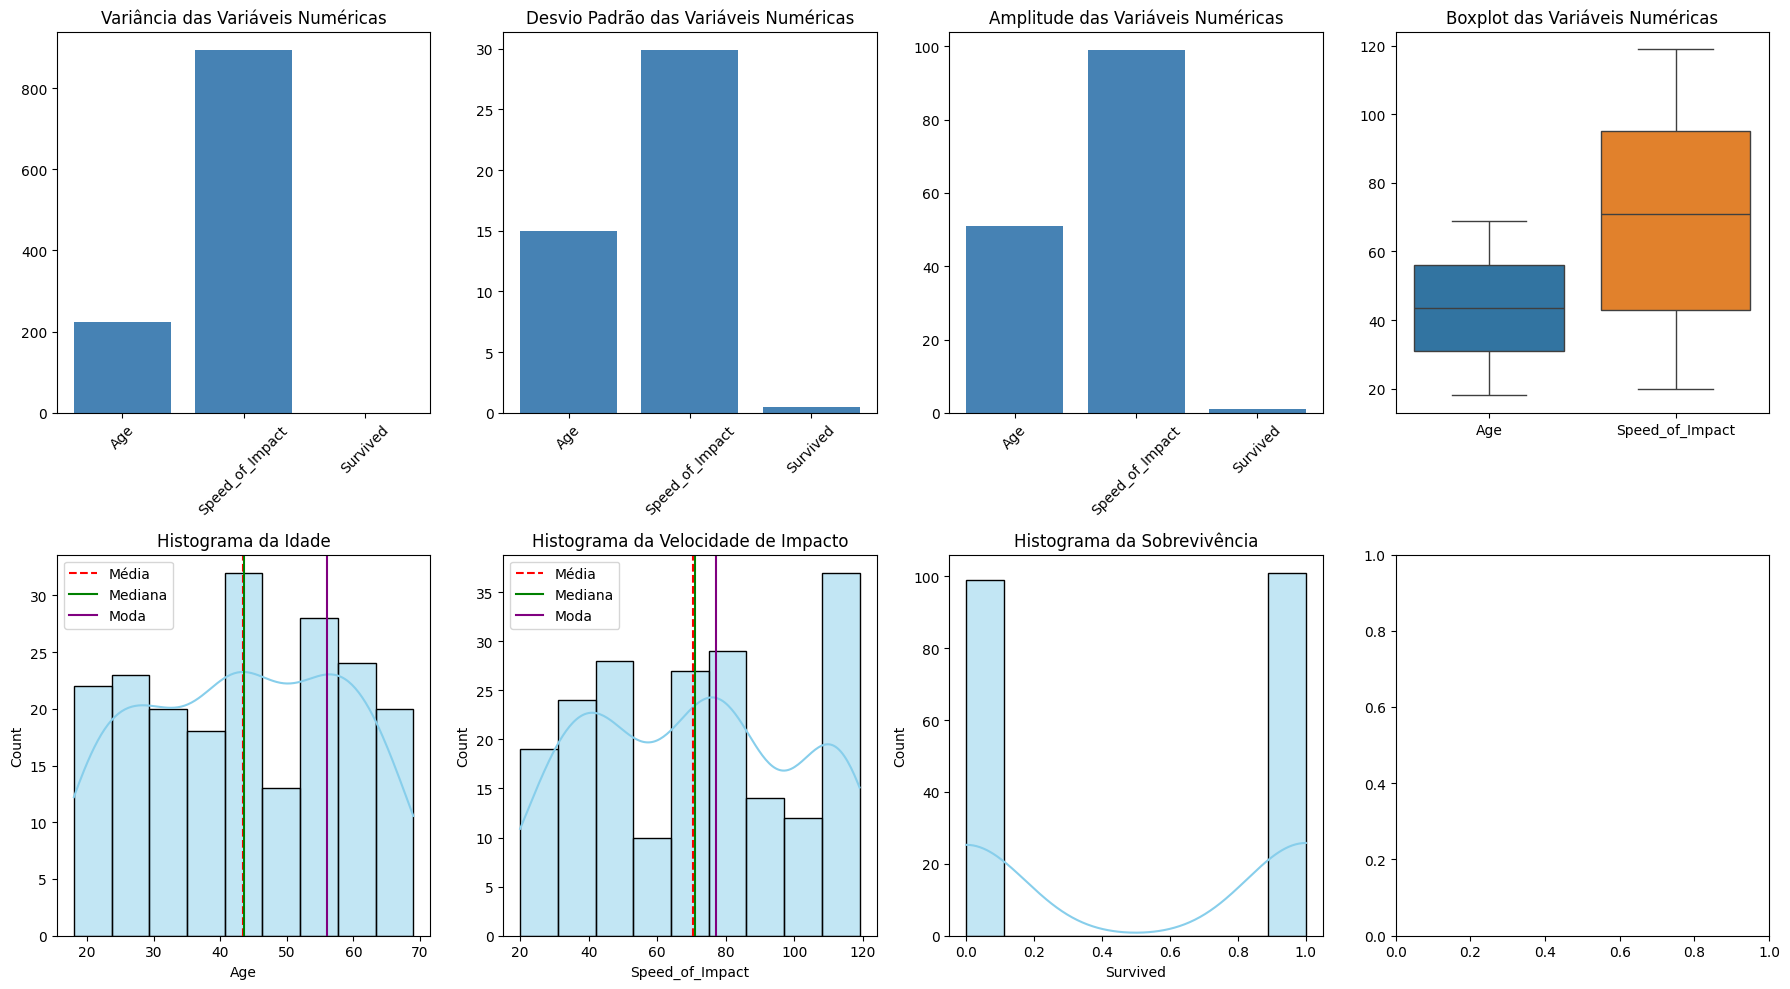

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/accident.csv'

data = pd.read_csv(file_path)

# Cálculo das medidas estatísticas
variancia = data.var(numeric_only=True)
desvio_padrao = data.std(numeric_only=True)
amplitude = data.max(numeric_only=True) - data.min(numeric_only=True)

# Cálculo de Média, Mediana e Moda
media = data.mean(numeric_only=True)
mediana = data.median(numeric_only=True)
moda = data.mode(numeric_only=True).iloc[0]

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

axes[0, 0].bar(variancia.index, variancia.values, color='steelblue')
axes[0, 0].set_title("Variância das Variáveis Numéricas")
axes[0, 0].set_xticks(range(len(variancia.index)))
axes[0, 0].set_xticklabels(variancia.index, rotation=45)

axes[0, 1].bar(desvio_padrao.index, desvio_padrao.values, color='steelblue')
axes[0, 1].set_title("Desvio Padrão das Variáveis Numéricas")
axes[0, 1].set_xticks(range(len(desvio_padrao.index)))
axes[0, 1].set_xticklabels(desvio_padrao.index, rotation=45)

axes[0, 2].bar(amplitude.index, amplitude.values, color='steelblue')
axes[0, 2].set_title("Amplitude das Variáveis Numéricas")
axes[0, 2].set_xticks(range(len(amplitude.index)))
axes[0, 2].set_xticklabels(amplitude.index, rotation=45)

sns.boxplot(data=data[['Age', 'Speed_of_Impact']], ax=axes[0, 3])
axes[0, 3].set_title("Boxplot das Variáveis Numéricas")

sns.histplot(data['Age'], kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].axvline(media['Age'], color='red', linestyle='--', label='Média')
axes[1, 0].axvline(mediana['Age'], color='green', linestyle='-', label='Mediana')
axes[1, 0].axvline(moda['Age'], color='purple', linestyle='-', label='Moda')
axes[1, 0].set_title('Histograma da Idade')
axes[1, 0].legend()

sns.histplot(data['Speed_of_Impact'], kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].axvline(media['Speed_of_Impact'], color='red', linestyle='--', label='Média')
axes[1, 1].axvline(mediana['Speed_of_Impact'], color='green', linestyle='-', label='Mediana')
axes[1, 1].axvline(moda['Speed_of_Impact'], color='purple', linestyle='-', label='Moda')
axes[1, 1].set_title('Histograma da Velocidade de Impacto')
axes[1, 1].legend()

sns.histplot(data['Survived'], kde=True, color='skyblue', ax=axes[1, 2])
axes[1, 2].set_title('Histograma da Sobrevivência')

plt.tight_layout()
plt.show()


# 4.1 - Boxplot das Variáveis Numéricas

Boxplot para as variáveis Idade e Velocidade de Impacto oferece uma visão sobre a distribuição dos dados, incluindo a mediana, quartis e possíveis outliers.

*   Idade: O boxplot da idade pode mostrar que a maioria dos indivíduos está concentrada em torno da mediana (em torno dos 43-44 anos), mas pode haver alguns outliers (valores muito distantes da caixa). Isso indica que há algumas pessoas muito mais jovens ou mais velhas em comparação com a maioria.
*   Velocidade de Impacto: O boxplot da velocidade de impacto provavelmente mostra uma grande dispersão dos dados, com uma concentração significativa de valores, mas também pode apresentar outliers com velocidades de impacto muito altas ou muito baixas, o que pode ser indicativo de casos atípicos (acidentes extremos, por exemplo).

# 4.2 - Conclusão Geral dos Gráficos:
A variância, desvio padrão e amplitude indicam que a distribuição dos dados é bastante dispersa para variáveis como velocidade de impacto e idade, com valores extremos (outliers) em ambas as variáveis.

O boxplot revela que a velocidade de impacto tem uma dispersão significativa, com alguns valores extremos em ambas as direções, enquanto a idade pode apresentar alguns outliers, mas com uma maior concentração em torno da mediana.

Os histogramas ajudam a visualizar melhor a distribuição das variáveis. Para a idade, há uma concentração em faixas etárias médias, enquanto a velocidade de impacto mostra uma variação considerável. A sobrevivência tem uma distribuição binária, com uma quantidade similar de sobreviventes e não sobreviventes.


# 5.0 - Proposição de Hipótese: Explorando se a idade é um fator que influencia a probabilidade de sobrevivência ao impacto em relação à velocidade do impacto.

# 5.1 - Hipótese Elaborada:


##Hipótese Nula (H₀):
A velocidade de impacto não tem efeito significativo sobre a probabilidade de sobrevivência, independentemente da idade do indivíduo.

Embora existam variações nas idades dos indivíduos, a velocidade de impacto não afeta de maneira significativa as chances de sobrevivência, seja para pessoas mais jovens ou mais velhas. Além disso, não há interação entre idade e velocidade de impacto em termos de suas influências sobre a sobrevivência.


##Hipótese Alternativa (H₁):
A velocidade de impacto tem um efeito significativo sobre a probabilidade de sobrevivência, e a idade do indivíduo modula esse efeito, aumentando a probabilidade de sobrevivência em idades mais jovens e diminuindo em idades mais avançadas.

A velocidade de impacto realmente influencia a probabilidade de sobrevivência, mas a magnitude desse efeito depende da idade. Em outras palavras, indivíduos mais jovens podem ter uma maior probabilidade de sobreviver a acidentes com alta velocidade de impacto, enquanto indivíduos mais velhos podem ter uma chance reduzida de sobreviver ao mesmo impacto devido a fatores de saúde ou resistência física diminuída com a idade.

#Justificativa da Hipótese:


Velocidade de Impacto: A velocidade de impacto é um fator crítico em acidentes, com velocidades mais altas normalmente associadas a maiores danos e menor chance de sobrevivência. Portanto, esperamos que, independentemente da idade, velocidades mais altas estejam associadas a menores chances de sobrevivência.

Idade: A idade pode ser um fator mediador importante. Indivíduos mais jovens geralmente têm uma maior resistência física e capacidade de recuperação, o que pode aumentar suas chances de sobrevivência em acidentes. Já indivíduos mais velhos podem ter maior vulnerabilidade a lesões graves devido à diminuição da resistência física e fragilidade óssea.

Interação entre Idade e Velocidade de Impacto: A interação entre idade e velocidade de impacto sugere que, enquanto a velocidade é sempre um fator determinante para a sobrevivência, o impacto da velocidade pode ser mais prejudicial para as pessoas mais velhas do que para as mais jovens. Assim, a relação entre a velocidade e a sobrevivência pode não ser linear e poderia ser mais acentuada nas idades avançadas.

# 6.0 - Teste Estático:

Escolha: Este texte foi escolhido para analisar a probabilidade de qual hipótese pode ser mais acertiva, se é a H₀ ou a H₁

logit(Sobrevivencia)=β0+β1⋅Idade+β2.Velocidade de Impacto+β3.(Idade×Velocidade de Impacto)

Onde:
*   𝛽1 indica o efeito de idade sobre a sobrevivência,
*   𝛽2 indica o efeito de velocidade de impacto sobre a sobrevivência,
*   𝛽3 representa a interação entre idade e velocidade de impacto.

In [6]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/accident.csv'
data = pd.read_csv(file_path)
print(data.head())

# 1. Teste t de Student para comparar a idade média entre sobreviventes e não sobreviventes
# Dividir os dados em dois grupos: sobreviventes e não sobreviventes
age_survived = data[data['Survived'] == 1]['Age']
age_not_survived = data[data['Survived'] == 0]['Age']

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(age_survived, age_not_survived)

print("\nTeste t de Student para comparar a idade média entre sobreviventes e não sobreviventes:")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Há uma diferença significativa na idade média entre sobreviventes e não sobreviventes.")
else:
    print("Não há uma diferença significativa na idade média entre sobreviventes e não sobreviventes.")

# 2. Teste de Qui-Quadrado para verificar a associação entre gênero e sobrevivência
# Criar uma tabela de contingência entre 'Gender' e 'Survived'
contingency_table = pd.crosstab(data['Gender'], data['Survived'])

# Realizar o teste de qui-quadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nTeste de Qui-Quadrado para verificar a associação entre gênero e sobrevivência:")
print(f"Estatística qui-quadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Há uma associação significativa entre gênero e sobrevivência.")
else:
    print("Não há uma associação significativa entre gênero e sobrevivência.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0

Teste t de Student para comparar a idade média entre sobreviventes e não sobreviventes:
Estatística t: 1.5586
Valor p: 0.1207
Não há uma diferença significativa na idade média entre sobreviventes e não sobreviventes.

Teste de Qui-Quadrado para verificar a associação entre gênero e sobrevivência:
Estatística qui-quadrado: 2.4991
Valor p: 0.1139
Não há uma associação significativa entre gênero e sobrevivência.


# 6.1 - Resultados:

## Teste t de Student: Comparação da Idade Média entre Sobreviventes e Não Sobreviventes

###Estatística t: 1.5586
###Valor p: 0.1207


*   O valor p obtido (0.1207) é maior que o nível de significância de 0,05. Portanto, não há evidências estatísticas suficientes para concluir que a idade média dos sobreviventes seja diferente da idade média dos não sobreviventes. Em outras palavras, a idade não parece ter um efeito significativo na probabilidade de sobrevivência.

## Teste de Qui-Quadrado: Associação entre Gênero e Sobrevivência

### Estatística qui-quadrado: 2.4991

### Valor p: 0.1139


*   O valor p obtido (0.1139) é maior que o nível de significância de 0,05. Portanto, não há evidências estatísticas suficientes para afirmar que existe uma associação significativa entre gênero e sobrevivência. Em outras palavras, o gênero não parece influenciar significativamente a probabilidade de sobrevivência.


###Com base nos testes realizados:

A idade não demonstrou ser um fator significativo para a sobrevivência.

O gênero também não apresentou uma associação significativa com a sobrevivência.

#7.0 - Análise de Regressão

##7.1 - Regressão Linear Simples:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0

Modelo de Regressão Linear Simples
Intercepto: 42.36711365371719
Coeficiente: 0.023616860105380798
R²: -0.010909764007308587


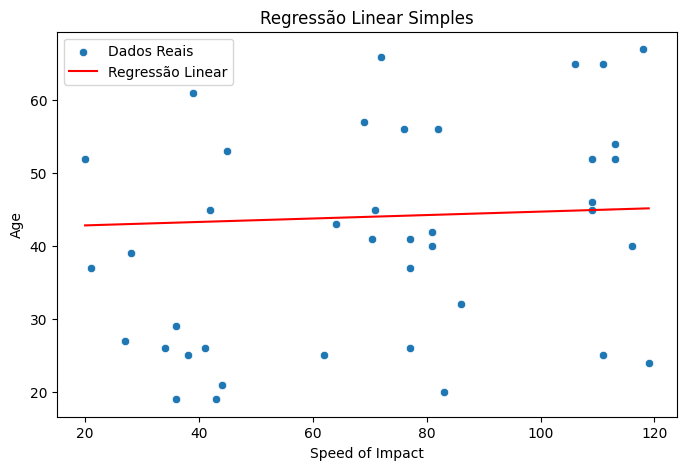

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind, chi2_contingency
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/accident.csv'  # Substitua pelo caminho correto
data = pd.read_csv(file_path)
print(data.head())

X = data[['Speed_of_Impact']]
y = data['Age']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

y_pred = modelo_linear.predict(X_test)

intercepto = modelo_linear.intercept_
coeficiente = modelo_linear.coef_[0]

print("\nModelo de Regressão Linear Simples")
print(f"Intercepto: {intercepto}")
print(f"Coeficiente: {coeficiente}")
print(f"R²: {r2_score(y_test, y_pred)}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Speed_of_Impact'], y=y_test, label="Dados Reais")
sns.lineplot(x=X_test['Speed_of_Impact'], y=y_pred, color="red", label="Regressão Linear")
plt.xlabel("Speed of Impact")
plt.ylabel("Age")
plt.title("Regressão Linear Simples")
plt.legend()
plt.show()

#8.0 - Conclusão Geral da Análise de Dados sobre Acidentes Rodoviários
A análise realizada teve como objetivo investigar os fatores que influenciam a sobrevivência de indivíduos envolvidos em acidentes rodoviários, com foco nas variáveis idade, velocidade do impacto, uso de capacete, uso de cinto de segurança e gênero. A partir dos dados, foram aplicadas técnicas estatísticas e modelos de regressão para testar hipóteses e identificar padrões

##8.1 - Conclusões Finais

*   Fatores Não Determinantes: Com base nas análises realizadas, idade e velocidade de impacto não são fatores determinantes para a sobrevivência em acidentes rodoviários. Isso pode indicar que outras variáveis não incluídas no estudo (como tipo de veículo, condições da estrada, tempo de resposta do socorro, etc.) têm maior influência no desfecho dos acidentes.

*   Uso de Equipamentos de Segurança: Embora não tenham sido foco desta análise, variáveis como uso de capacete e cinto de segurança podem ter um impacto significativo na sobrevivência. Recomenda-se uma análise futura que inclua essas variáveis de forma mais detalhada.

*   Limitações do Estudo: A ausência de correlações significativas pode ser resultado de limitações no conjunto de dados, como o tamanho da amostra ou a falta de variáveis relevantes. Além disso, a natureza binária da variável de sobrevivência pode dificultar a identificação de padrões mais complexos.

##8.2 - Recomendações para Ações Práticas

*   Coleta de Dados Adicionais: Sugere-se a inclusão de mais variáveis no estudo, como tipo de veículo, condições climáticas, localização do acidente e tempo de resposta do socorro.

*   Foco em Equipamentos de Segurança: Dada a importância do uso de capacetes e cintos de segurança em outros estudos, recomenda-se uma análise específica sobre o impacto desses equipamentos na sobrevivência.

*   Campanhas de Conscientização: Mesmo que idade e velocidade de impacto não tenham mostrado influência significativa, campanhas de conscientização sobre direção segura e uso de equipamentos de proteção continuam sendo essenciais para reduzir a gravidade dos acidentes.

## 8.3 - Considerações Finais
A análise dos dados de acidentes rodoviários revelou que idade e velocidade de impacto não são fatores determinantes para a sobrevivência, pelo menos no conjunto de dados analisado. No entanto, isso não diminui a importância de políticas públicas e campanhas de segurança no trânsito, que devem continuar focando na prevenção de acidentes e no uso de equipamentos de proteção. Estudos futuros com variáveis mais abrangentes e amostras maiores podem trazer melhores resultados sobre os fatores que realmente influenciam a sobrevivência em acidentes rodoviários.
